In [1]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import datetime
import pandas as pd

In [2]:
start_date = datetime.datetime(2017, 1, 1)
end_date = datetime.datetime(2021, 12, 31)

amd = data.DataReader("AMD", start=start_date, end=end_date, data_source="yahoo")

amd.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,11.65,11.02,11.42,11.43,55182000,11.43
2017-01-04,11.52,11.24,11.45,11.43,40781200,11.43
2017-01-05,11.69,11.23,11.43,11.24,38855200,11.24
2017-01-06,11.49,11.11,11.29,11.32,34453500,11.32
2017-01-09,11.64,11.31,11.37,11.49,37304800,11.49


<AxesSubplot:xlabel='Date'>

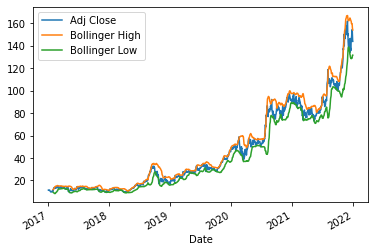

In [5]:
# trading days in a month = 20 {5 days, 4 weeks}
window = 20
no_of_std = 2

df = pd.concat([amd["Adj Close"]], axis=1)

rolling_mean = df["Adj Close"].rolling(window).mean()
rolling_std = df["Adj Close"].rolling(window).std()

df["Mid"] = rolling_mean
df["Bollinger High"] = rolling_mean + (rolling_std * no_of_std)
df["Bollinger Low"] = rolling_mean - (rolling_std * no_of_std)

df.tail()

df[["Adj Close", "Bollinger High", "Bollinger Low"]].plot()